# Check RHS Expression of cGHG system

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]]

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

In [2]:
DefManifold[M4, 4, IndexRange[a, z]];

In [3]:
DefChart[cart, M4, {0, 1, 2, 3}, {T[], X[], Y[], Z[]}, ChartColor -> Blue];

In [4]:
<< "wl/cGHG_vars_check.wl";

In [5]:
<< "wl/ADM_vars_check.wl";

In [6]:
<< "wl/cGHG_rhs.wl";

## Define Scalar Functions

In [7]:
DefScalarFunction[fW];
Module[{co = {x, y, z}},
  DefScalarFunction[falpha];
  Do[DefScalarFunction[ToExpression["fbeta" <> ToString[co[[ii]]]]], {ii, 1, 3}];
  Do[DefScalarFunction[ToExpression["fgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]]]], {ii, 1, 3}, {jj, ii, 3}];
  Do[DefScalarFunction[ToExpression["fK" <> ToString[co[[ii]]] <> ToString[co[[jj]]]]], {ii, 1, 3}, {jj, ii, 3}]
];
Module[{co = {x, y, z}},
  DefScalarFunction[fdtalpha];
  Do[DefScalarFunction[ToExpression["fdtbeta" <> ToString[co[[ii]]]]], {ii, 1, 3}];
  Do[DefScalarFunction[ToExpression["fdtgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]]]], {ii, 1, 3}, {jj, ii, 3}]
];

## Set ADM Variable Components with Scalar Functions

In [10]:
ComponentValue[W[], fW[X[], Y[], Z[]]];

In [11]:
Module[{co = {x, y, z}},
  ComponentValue[ADMalpha[], falpha[X[], Y[], Z[]]];
  Do[ComponentValue[ADMbeta[{ii, cart}], If[ii == 0, 0, ToExpression["fbeta" <> ToString[co[[ii]]] <> "[X[],Y[],Z[]]"]]], {ii, 0, 3}];
  Do[ComponentValue[ADMgamma[{ii, -cart}, {jj, -cart}], ToExpression["fgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]] <> "[X[],Y[],Z[]]"]], {ii, 1, 3}, {jj, ii, 3}];
  Do[ComponentValue[ADMexK[{ii, -cart}, {jj, -cart}], ToExpression["fK" <> ToString[co[[ii]]] <> ToString[co[[jj]]] <> "[X[],Y[],Z[]]"]], {ii, 1, 3}, {jj, ii, 3}]
];
ADMgamma[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;
ADMexK[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

In [14]:
Module[{co = {x, y, z}},
  ComponentValue[ADMdtalpha[], fdtalpha[X[], Y[], Z[]]];
  Do[ComponentValue[ADMdtbeta[{ii, cart}], If[ii == 0, 0, ToExpression["fdtbeta" <> ToString[co[[ii]]] <> "[X[],Y[],Z[]]"]]], {ii, 0, 3}];
  Do[ComponentValue[ADMdtgamma[{ii, -cart}, {jj, -cart}], ToExpression["fdtgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]] <> "[X[],Y[],Z[]]"]], {ii, 1, 3}, {jj, ii, 3}]
];
ADMdtgamma[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

## Set Auxiliary Variables with ADM Variables

### $\alpha,\beta^i$

In [16]:
ComponentValue[alpha[], ADMalpha[] // ToValues];
Do[ComponentValue[beta[{ii, cart}], ADMbeta[{ii, cart}] // ToValues], {ii, 0, 3}];

### $\gamma^{ij}=(\gamma_{ij})^{-1}, \hat\gamma^{ij}=W^{-2}\gamma^{ij}$ where $W=(\gamma/\hat{g})^{-1/6}=\gamma^{-1/6}$

In [18]:
Module[{gammaMat, invgammaMat},
  gammaMat = Table[ADMgamma[{ii, -cart}, {jj, -cart}] // ToValues, {ii, 1, 3}, {jj, 1, 3}];
  invgammaMat = Inverse[gammaMat] /. {1/Det[gammaMat] -> (W[] // ToValues)^6};
  Do[ComponentValue[invgam[{aa, cart}, {bb, cart}], If[aa == 0 || bb == 0, 0, invgammaMat[[aa, bb]]]], {aa, 0, 3}, {bb, 0, 3}]
];
Do[ComponentValue[invhg[{aa, cart}, {bb, cart}], If[aa == 0 || bb == 0, 0, (W[] // ToValues)^-2 invgam[{aa, cart}, {bb, cart}] // ToValues]], {aa, 0, 3}, {bb, 0, 3}];

### $n^a = (\alpha^{-1},-\alpha^{-1}\beta^i)$

In [20]:
Do[ComponentValue[nvec[{aa, cart}], If[aa == 0, ADMalpha[]^-1, -ADMalpha[]^-1 ADMbeta[{aa, cart}]] // ToValues], {aa, 0, 3}];

### $g^{ab}=\gamma^{ab}-n^an^b$

In [21]:
Do[ComponentValue[invg4[{aa, cart}, {bb, cart}], invgam[{aa, cart}, {bb, cart}] - nvec[{aa, cart}] nvec[{bb, cart}] // ToValues], {aa, 0, 3}, {bb, 0, 3}];

### $\partial_cg_{ij}=\partial_c\gamma_{ij}, \partial_cg_{0i}=\partial_c\gamma_{il}\beta^l+\gamma_{il}\partial_c\beta^l, \partial_cg_{00}=-2\alpha\partial_c\alpha+2\beta_l\partial_c\beta^l+\beta^k\beta^l\partial_c\gamma_{kl}$

In [22]:
Do[ComponentValue[dg4[{cc, -cart}, {aa, -cart}, {bb, -cart}],
    If[cc == 0,
        If[aa == 0 && bb == 0,
            -2 ADMalpha[] ADMdtalpha[] + 2 ADMgamma[-k, -l] ADMbeta[k] ADMdtbeta[l] + ADMbeta[k] ADMbeta[l] ADMdtgamma[-k, -l],
            If[aa == 0,
                ADMbeta[l] ADMdtgamma[{bb, -cart}, -l] + ADMgamma[{bb, -cart}, -l] ADMdtbeta[l],
                ADMdtgamma[{aa, -cart}, {bb, -cart}]
            ]
        ],
        If[aa == 0 && bb == 0,
            -2 ADMalpha[] PDcart[{cc, -cart}][ADMalpha[]] + 2 ADMgamma[-k, -l] ADMbeta[k] PDcart[{cc, -cart}][ADMbeta[l]] + ADMbeta[k] ADMbeta[l] PDcart[{cc, -cart}][ADMgamma[-k, -l]],
            If[aa == 0,
                ADMbeta[l] PDcart[{cc, -cart}][ADMgamma[{bb, -cart}, -l]] + ADMgamma[{bb, -cart}, -l] PDcart[{cc, -cart}][ADMbeta[l]],
                PDcart[{cc, -cart}][ADMgamma[{aa, -cart}, {bb, -cart}]]
            ]
        ]
    ] // DummyToBasis[cart] // TraceBasisDummy // ToValues
], {cc, 0, 3}, {aa, 0, 3}, {bb, aa, 3}];

In [23]:
dg4[-c, -a, -b] // ToBasis[cart] // ComponentArray // ComponentValue;

## Set cGHG Evolution Variables with Auxiliary Variables and ADM Variables

### $\varPi=-\alpha\partial_nW=\frac{1}{6}\alpha W\gamma^{kl}\partial_n\gamma_{kl}, \Phi_i=\alpha\partial_iW=-\frac{1}{6}\alpha W\gamma^{kl}\partial_i\gamma_{kl}$

In [24]:
ComponentValue[WPi[], 1/6 alpha[] W[] invgam[k, l] nvec[c] dg4[-c, -k, -l] // DummyToBasis[cart] // TraceBasisDummy // ToValues];
Do[ComponentValue[WPhi[{ii, -cart}], -(1/6) alpha[] W[] invgam[k, l] dg4[{ii, -cart}, -k, -l] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {ii, 1, 3}];

### $\hat{g}_{\mathbf{nn}}=-2\alpha, \hat{g}_\mathbf{n}{}^i=\beta^i, \hat{g}_{ij}=W^2\gamma_{ij}$

In [26]:
ComponentValue[hgnn[], -2 alpha[] // ToValues];
Do[ComponentValue[hgn[{ii, cart}], If[ii == 0, 0, beta[{ii, cart}] // ToValues]], {ii, 0, 3}];
Do[ComponentValue[hg[{ii, -cart}, {jj, -cart}], W[]^2 ADMgamma[{ii, -cart}, {jj, -cart}] // ToValues], {ii, 1, 3}, {jj, ii, 3}];

In [29]:
hg[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

### $\hat\Pi_{\mathbf{nn}}=-\alpha^2\partial_\mathbf{n}g_{\mathbf{nn}}, \hat\Pi_{\mathbf{n}}{}^i=-\alpha^2\gamma^{ij}\partial_\mathbf{n}g_{\mathbf{n}j}, \hat\Pi_{ij}=-\alpha W^2\partial_\mathbf{n}g_{ij}+2W^{-1}\varPi\hat{g}_{ij}$

In [30]:
ComponentValue[hPinn[], -alpha[]^2 nvec[c] nvec[a] nvec[b] dg4[-c, -a, -b] // DummyToBasis[cart] // TraceBasisDummy // ToValues];
Do[ComponentValue[hPin[{ii, cart}], If[ii == 0, 0, -alpha[]^2 invgam[{ii, cart}, j] nvec[c] nvec[a] dg4[-c, -a, -j]] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {ii, 0, 3}];
Do[ComponentValue[hPi[{ii, -cart}, {jj, -cart}], -alpha[] W[]^2 nvec[c] dg4[-c, {ii, -cart}, {jj, -cart}] + 2 W[]^-1 WPi[] hg[{ii, -cart}, {jj, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {ii, 1, 3}, {jj, ii, 3}];

In [33]:
hPi[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

### $\hat\Phi_{k\mathbf{nn}}=\alpha^2\partial_kg_{\mathbf{nn}}, \hat\Phi_{k\mathbf{n}}{}^i=\alpha^2\gamma^{ij}\partial_kg_{\mathbf{n}j}, \hat\Phi_{kij}=\alpha W^2\partial_kg_{ij}+2W^{-1}\Phi_k\hat{g}_{ij}$

In [34]:
Do[ComponentValue[hPhinn[{kk, -cart}], alpha[]^2 nvec[c] nvec[d] dg4[{kk, -cart}, -c, -d] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {kk, 1, 3}];
Do[ComponentValue[hPhin[{kk, -cart}, {ii, cart}], If[ii == 0, 0, alpha[]^2 invgam[{ii, cart}, j] nvec[a] dg4[{kk, -cart}, -a, -j]] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {kk, 1, 3}, {ii, 0, 3}];
Do[ComponentValue[hPhi[{kk, -cart}, {ii, -cart}, {jj, -cart}], alpha[] W[]^2 dg4[{kk, -cart}, {ii, -cart}, {jj, -cart}] + 2 W[]^-1 WPhi[{kk, -cart}] hg[{ii, -cart}, {jj, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {kk, 1, 3}, {ii, 1, 3}, {jj, 1, 3}];

In [37]:
hPhi[-k, -i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

In [38]:
ComponentValue[hPhin[{0, -cart}, {0, cart}], 0];

### $\hat{H}_\mathbf{n}=-\hat\Gamma_{\mathbf{n}}, \hat{H}_i=-\hat\Gamma_i$

#### $\hat\Pi_{\mathbf{n}i}=\hat{g}_{ij}\hat\Pi_{\mathbf{n}}{}^j, \hat\Phi_{k\mathbf{n}i}=\hat{g}_{ij}\hat\Phi_{k\mathbf{n}}{}^j$

In [39]:
Do[ComponentValue[hPinD[{ii, -cart}], hg[{ii, -cart}, -j] hPin[j] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {ii, 1, 3}];
Do[ComponentValue[hPhinD[{kk, -cart}, {ii, -cart}], hg[{ii, -cart}, -j] hPhin[{kk, -cart}, j] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {kk, 1, 3}, {ii, 1, 3}];

#### $\hat\Gamma_{kij}=\frac{1}{2}(\hat\Phi_{ijk}+\hat\Phi_{jki}-\hat\Phi_{kij}), \hat\Gamma_{k\mathbf{n}i}=\alpha^{-1}\hat\Phi_{[ik]\mathbf{n}}-\frac{1}{2}\hat\Pi_{ki}, \hat\Gamma_{\mathbf{n}ij}=\alpha^{-1}\hat\Phi_{(ij)\mathbf{n}}+\frac{1}{2}\hat\Pi_{ij}$

In [41]:
Do[ComponentValue[hGam[{kk, -cart}, {ii, -cart}, {jj, -cart}],
    1/2 (hPhi[{ii, -cart}, {jj, -cart}, {kk, -cart}] + hPhi[{jj, -cart}, {kk, -cart}, {ii, -cart}] - hPhi[{kk, -cart}, {ii, -cart}, {jj, -cart}]) // ToValues], {kk, 1, 3}, {ii, 1, 3}, {jj, ii, 3}]
Do[ComponentValue[hGamnmix[{kk, -cart}, {ii, -cart}],
    1/2 alpha[]^-1 (hPhinD[{ii, -cart}, {kk, -cart}] - hPhinD[{kk, -cart}, {ii, -cart}]) - 1/2 hPi[{kk, -cart}, {ii, -cart}] // ToValues], {kk, 1, 3}, {ii, 1, 3}];
Do[ComponentValue[hGamn[{ii, -cart}, {jj, -cart}],
    1/2 alpha[]^-1 (hPhinD[{ii, -cart}, {jj, -cart}] + hPhinD[{jj, -cart}, {ii, -cart}]) + 1/2 hPi[{ii, -cart}, {jj, -cart}] // ToValues], {ii, 1, 3}, {jj, ii, 3}];

In [44]:
hGam[-k, -i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;
hGamn[-i, -j] // ToBasis[cart] // ComponentArray // ComponentValue;

#### $\hat\Gamma_{\mathbf{n}}=\hat{g}^{ij}\hat\Gamma_{\mathbf{n}ij}+\frac{1}{2}\alpha^{-1}\hat\Pi_\mathbf{nn}-3W^{-1}\varPi, \hat\Gamma_k=W^2(\alpha\hat\gamma^{ij}\hat\Gamma_{kij}+\frac{1}{2}\hat\Phi_{k\mathbf{nn}})+\alpha W\varPhi_k+\hat\Pi_{\mathbf{n}k}$

In [46]:
ComponentValue[trhGamn[], invhg[i, j] hGamn[-i, -j] + 1/2 alpha[]^-1 hPinn[] - 3 W[]^-1 WPi[] // DummyToBasis[cart] // TraceBasisDummy // ToValues];
Do[ComponentValue[trhGam[{kk, -cart}],
    W[]^2 (alpha[] invhg[i, j] hGam[{kk, -cart}, -i, -j] + 1/2 hPhinn[{kk, -cart}]) + alpha[] W[] WPhi[{kk, -cart}] + hPinD[{kk, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues], {kk, 1, 3}];

#### $\hat{H}_\mathbf{n}, \hat{H}_i$

In [48]:
ComponentValue[hHn[], -trhGamn[] // ToValues];
Do[ComponentValue[hH[{ii, -cart}], -trhGam[{ii, -cart}] // ToValues], {ii, 1, 3}];

## Derivative Terms

### $\partial W, \partial\varPi, \partial\varPhi$

In [50]:
IndexSetDelayed[dW[k_], PDcart[k][W[]]];
IndexSetDelayed[dWPi[k_], PDcart[k][WPi[]]];
IndexSetDelayed[dWPhi[k_, i_], PDcart[k][WPhi[i]]];

### $\partial\hat{g}, \partial\hat\Pi, \partial\hat\Phi$

In [53]:
IndexSetDelayed[dhgnn[k_], PDcart[k][hgnn[]]];
IndexSetDelayed[dhgn[k_, i_], PDcart[k][hgn[i]]];
IndexSetDelayed[dhg[k_, i_, j_], PDcart[k][hg[i, j]]];

In [56]:
IndexSetDelayed[dhPinn[k_], PDcart[k][hPinn[]]];
IndexSetDelayed[dhPin[k_, i_], PDcart[k][hPin[i]]];
IndexSetDelayed[dhPi[k_, i_, j_], PDcart[k][hPi[i, j]]];

In [59]:
IndexSetDelayed[dhPhinn[k_, i_], PDcart[k][hPhinn[i]]];
IndexSetDelayed[dhPhin[k_, l_, i_], PDcart[k][hPhin[l, i]]];
IndexSetDelayed[dhPhi[k_, l_, i_, j_], PDcart[k][hPhi[l, i, j]]];

### $\partial\hat{H}, \partial\hat\theta$

In [62]:
IndexSetDelayed[dhHn[k_], PDcart[k][hHn[]]];
IndexSetDelayed[dhH[k_, i_], PDcart[k][hH[i]]];

In [64]:
IndexSetDelayed[dhthetan[k_], PDcart[k][hthetan[]]];
IndexSetDelayed[dhtheta[k_, i_], PDcart[k][htheta[i]]];

## Extra Terms

### $\hat\theta$

In [66]:
IndexSetDelayed[hthetan[], -beta[k] PDcart[-k][hHn[]]];
IndexSetDelayed[htheta[i_], -beta[k] PDcart[-k][hH[i]]];

### $\alpha\partial_\mathbf{n}\hat{H}$

In [68]:
IndexSetDelayed[adnhHn[], hthetan[]];
IndexSetDelayed[adnhH[i_], htheta[i]];

## Check RHS

### Functions

In [70]:
toExplicit[sf_] := Module[{},
    {
    sf[X[], Y[], Z[]] -> ToExpression[ToString[sf] <> "$expl"][],
    D[sf[X[], Y[], Z[]], X[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], X[]]),
    D[sf[X[], Y[], Z[]], Y[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], Y[]]),
    D[sf[X[], Y[], Z[]], Z[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], Z[]]),
    D[sf[X[], Y[], Z[]], X[], X[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], X[], X[]]),
    D[sf[X[], Y[], Z[]], X[], Y[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], X[], Y[]]),
    D[sf[X[], Y[], Z[]], X[], Z[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], X[], Z[]]),
    D[sf[X[], Y[], Z[]], Y[], Y[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], Y[], Y[]]),
    D[sf[X[], Y[], Z[]], Y[], Z[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], Y[], Z[]]),
    D[sf[X[], Y[], Z[]], Z[], Z[]] -> (D[ToExpression[ToString[sf] <> "$expl"][], Z[], Z[]])
    }
];

In [71]:
cndList[] := Module[{co = {x, y, z}, cnd$radi, cnd$scalar},
    (* radi *)
    cnd$radi = toExplicit[radi];
    (* scalar *)
    cnd$fW = toExplicit[fW];
    cnd$falpha = toExplicit[falpha];
    Do[ToExpression["cnd$fbeta" <> ToString[co[[ii]]], InputForm,
        Function[name, name = toExplicit[ToExpression["fbeta" <> ToString[co[[ii]]]]], HoldAll]], {ii, 1, 3}];
    Do[ToExpression["cnd$fgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]], InputForm,
        Function[name, name = toExplicit[ToExpression["fgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]]]], HoldAll]], {ii, 1, 3}, {jj, ii, 3}];
    cnd$fdtalpha = toExplicit[fdtalpha];
    Do[ToExpression["cnd$fdtbeta" <> ToString[co[[ii]]], InputForm, 
        Function[name, name = toExplicit[ToExpression["fdtbeta" <> ToString[co[[ii]]]]], HoldAll]], {ii, 1, 3}];
    Do[ToExpression["cnd$fdtgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]], InputForm, 
        Function[name, name = toExplicit[ToExpression["fdtgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]]]], HoldAll]], {ii, 1, 3}, {jj, ii, 3}];
    cnd$scalar = Join[
        cnd$fW,
        cnd$falpha, cnd$fbetax, cnd$fbetay, cnd$fbetaz,
        cnd$fgammaxx, cnd$fgammaxy, cnd$fgammaxz, cnd$fgammayy, cnd$fgammayz, cnd$fgammazz,
        cnd$fdtalpha, cnd$fdtbetax, cnd$fdtbetay, cnd$fdtbetaz,
        cnd$fdtgammaxx, cnd$fdtgammaxy, cnd$fdtgammaxz, cnd$fdtgammayy, cnd$fdtgammayz, cnd$fdtgammazz
    ];
    {cnd$radi, cnd$scalar}
];

### BH Parameters

In [72]:
DefConstantSymbol[angv, PrintAs -> "a"];
DefConstantSymbol[mass, PrintAs -> "M"];
DefScalarFunction[radi, PrintAs -> "r"];

### Kerr-Schild

$$
\begin{align}
k_a
&=
\left(
    1, \frac{rx+ay}{r^2+a^2}, \frac{ry-ax}{r^2+a^2}, \frac{z}{r}
\right)
\\
f
&=\frac{r^2}{r^4+a^2z^2}2Mr
\\
g_{ab}
&=\eta_{ab}+fk_ak_b
\\
\beta_i
&=g_{0i}=fk_0k_i
\\
\alpha
&=
\left(
    1+\frac{2Mr^3}{r^4+a^2z^2}
\right)^{-1/2}
\\
W
&=\gamma^{-1/6}
\end{align}
$$

with $\frac{x^2+y^2}{r^2+a^2}+\frac{z^2}{r^2}=1$

In [75]:
Module[{co = {x, y, z}, kVec, KSk, KSf, KSgamma, KSbeta, gammaMat, invgammaMat},
    kVec = {1, (radi[X[], Y[], Z[]] X[] + angv Y[])/(radi[X[], Y[], Z[]]^2 + angv^2), (radi[X[], Y[], Z[]] Y[] - angv X[])/(radi[X[], Y[], Z[]]^2 + angv^2), Z[]/radi[X[], Y[], Z[]]};
    KSf = radi[X[], Y[], Z[]]^2/(radi[X[], Y[], Z[]]^4 + angv^2 Z[]^2) 2 mass radi[X[], Y[], Z[]];
    KSk[aa_] := kVec[[aa + 1]];
    KSgamma[ii_, jj_] := KroneckerDelta[ii, jj] + KSf KSk[ii] KSk[jj];
    KSbeta[ii_] := (KSf KSk[0] KSk[ii]);
    gammaMat = (Table[KSgamma[ii, jj], {ii, 1, 3}, {jj, 1, 3}] // Simplify);
    invgammaMat = (Inverse[gammaMat] // Simplify);
    (* \[Gamma],\[Beta],\[Alpha] *)
    Do[ToExpression["fgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]] <> "$expl"][] = KSgamma[ii, jj] // Simplify, {ii, 1, 3}, {jj, ii, 3}];
    Do[ToExpression["fbeta" <> ToString[co[[ii]]] <> "$expl"][] = (Sum[invgammaMat[[ii, jj]] KSbeta[jj], {jj, 1, 3}] // Simplify), {ii, 1, 3}];
    ToExpression["falpha" <> "$expl"][] = (1 + (2 mass radi[X[], Y[], Z[]]^3)/(radi[X[], Y[], Z[]]^4 + angv^2 Z[]^2))^(-1/2);
    (* W *)
    ToExpression["fW" <> "$expl"][] = (Det[gammaMat] // Simplify)^(-1/6);
    (* Overscript[\[Gamma], .],Overscript[\[Beta], .],Overscript[\[Alpha], .] *)
    Do[ToExpression["fdtgamma" <> ToString[co[[ii]]] <> ToString[co[[jj]]] <> "$expl"][] = 0, {ii, 1, 3}, {jj, ii, 3}];
    Do[ToExpression["fdtbeta" <> ToString[co[[ii]]] <> "$expl"][] = 0, {ii, 1, 3}];
    ToExpression["fdtalpha" <> "$expl"][] = 0;
];
ToExpression["radi" <> "$expl"][] = (Sqrt[1/2 (-angv^2 + X[]^2 + Y[]^2 + Z[]^2 + Sqrt[4 angv^2 Z[]^2 + (angv^2 - X[]^2 - Y[]^2 - Z[]^2)^2])] // Simplify);
(* set cndRadi, cndScalar *)
{cndRadi, cndScalar} = cndList[];

In [79]:
cndSample = {X[] -> 0.5, Y[] -> 0.5, Z[] -> 0.5, angv -> 0.4, mass -> 1};

#### since

2      2      2      2
{{r -> -(Sqrt[-angv  + X[]  + Y[]  + Z[]  - 
 
                      2    2        2      2      2      2 2
>          Sqrt[4 angv  Z[]  + (angv  - X[]  - Y[]  - Z[] ) ]] / Sqrt[2])}, 
 
                    2      2      2      2
>   {r -> Sqrt[-angv  + X[]  + Y[]  + Z[]  - 
 
                    2    2        2      2      2      2 2
>        Sqrt[4 angv  Z[]  + (angv  - X[]  - Y[]  - Z[] ) ]] / Sqrt[2]}, 
 
                      2      2      2      2
>   {r -> -(Sqrt[-angv  + X[]  + Y[]  + Z[]  + 
 
                      2    2        2      2      2      2 2
>          Sqrt[4 angv  Z[]  + (angv  - X[]  - Y[]  - Z[] ) ]] / Sqrt[2])}, 
 
                    2      2      2      2
>   {r -> Sqrt[-angv  + X[]  + Y[]  + Z[]  + 
 
                    2    2        2      2      2      2 2
>        Sqrt[4 angv  Z[]  + (angv  - X[]  - Y[]  - Z[] ) ]] / Sqrt[2]}}
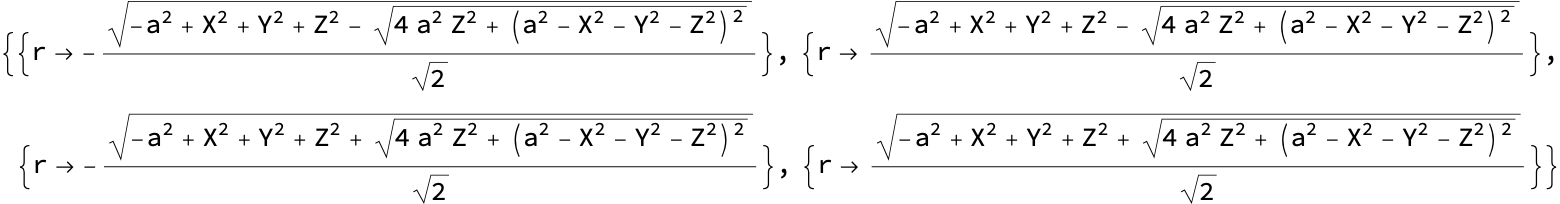

In [80]:
Solve[(X[]^2 + Y[]^2)/(r^2 + angv^2) + Z[]^2/r^2 == 1, r]

#### small test

check expression of $\alpha$

In [81]:
Module[{co = {x, y, z}, kVec, KSk, KSf, KSgamma, KSbeta, gammaMat, invgammaMat},
    kVec = {1, (radi[X[], Y[], Z[]] X[] + angv Y[])/(radi[X[], Y[], Z[]]^2 + angv^2), (radi[X[], Y[], Z[]] Y[] - angv X[])/(radi[X[], Y[], Z[]]^2 + angv^2), Z[]/radi[X[], Y[], Z[]]};
    KSf = radi[X[], Y[], Z[]]^2/(radi[X[], Y[], Z[]]^4 + angv^2 Z[]^2) 2 mass radi[X[], Y[], Z[]];
    KSk[aa_] := kVec[[aa + 1]];
    KSgamma[ii_, jj_] := KroneckerDelta[ii, jj] + KSf KSk[ii] KSk[jj];
    KSbeta[ii_] := (KSf KSk[0] KSk[ii]);
    gammaMat = (Table[KSgamma[ii, jj], {ii, 1, 3}, {jj, 1, 3}] // Simplify);
    invgammaMat = (Inverse[gammaMat] // Simplify);
    (((Sum[invgammaMat[[ii, jj]] KSbeta[ii] KSbeta[jj], {ii, 1, 3}, {jj, 1, 3}] - (-1 + KSf KSk[0] KSk[0])) - falpha$expl[]^2 // Simplify) /. {radi[X[], Y[], Z[]] -> radi$expl[]} // Simplify)
]

0

#### RHS

##### $\partial_t\hat{g}$

-Image-
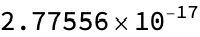

In [82]:
Rasterize[(dthgnn$RHS[] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample]

-Image-
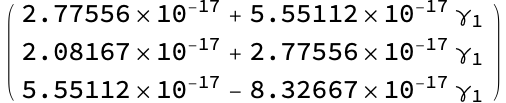

In [83]:
Rasterize[Table[(dthgn$RHS[{ii, cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {ii, 1, 3}] // MatrixForm]

-Image-
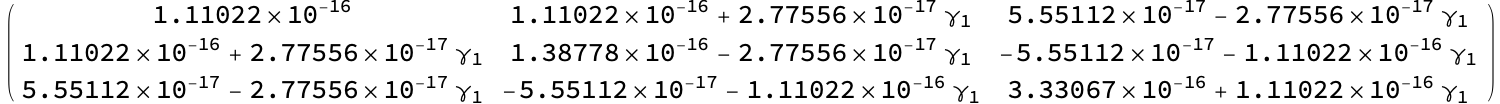

In [84]:
Rasterize[Table[(dthg$RHS[{ii, -cart}, {jj, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm]

##### $\partial\hat\Pi$

-Image-
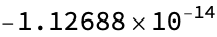

In [85]:
Rasterize[(dthPinn$RHS[] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample]

-Image-
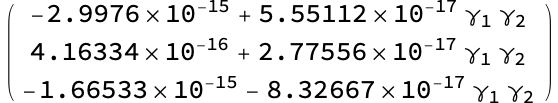

In [86]:
Rasterize[Table[(dthPin$RHS[{ii, cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {ii, 1, 3}] // MatrixForm]

-Image-
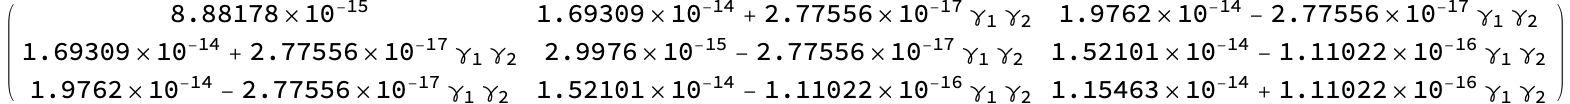

In [87]:
Rasterize[Table[((dthPi$RHS[{ii, -cart}, {jj, -cart}] /. {trPi[] -> trPi$RHS[]}) // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm]

##### $\partial_t\hat\Phi$

-Image-
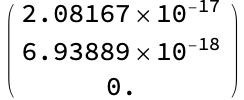

In [88]:
Rasterize[Table[(dthPhinn$RHS[{kk, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {kk, 1, 3}] // MatrixForm]

-Image-
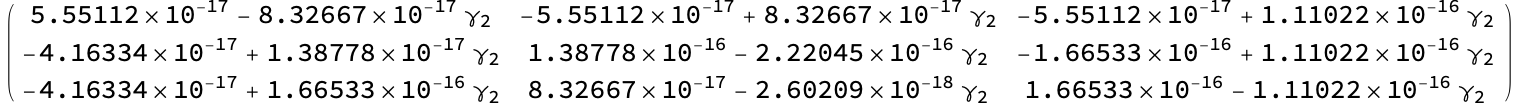

In [89]:
Rasterize[Table[(dthPhin$RHS[{kk, -cart}, {ii, cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {kk, 1, 3}, {ii, 1, 3}] // MatrixForm]

-Image-
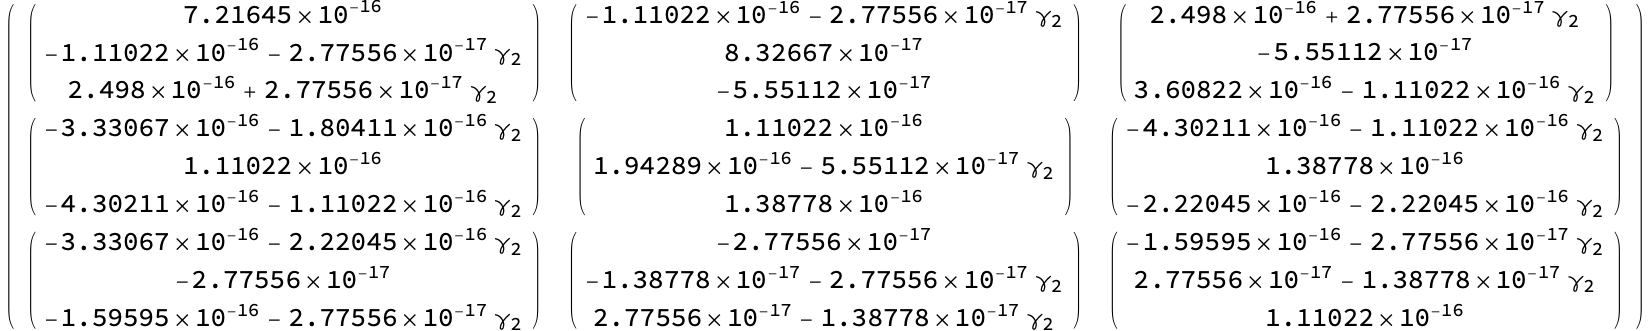

In [90]:
Rasterize[Table[(dthPhi$RHS[{kk, -cart}, {ii, -cart}, {jj, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {kk, 1, 3}, {ii, 1, 3}, {jj, 1, 3}] // MatrixForm]

##### $\partial_tW, \partial_t\varPi, \partial_t\varPhi$

-Image-
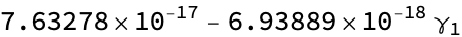

In [91]:
Rasterize[(dtW$RHS[] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample]

-Image-
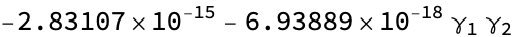

In [92]:
Rasterize[((dtWPi$RHS[] /. {trPi[] -> trPi$RHS[]}) // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample]

-Image-
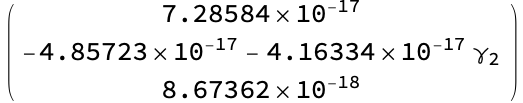

In [93]:
Rasterize[Table[(dtWPhi$RHS[{kk, -cart}] // DummyToBasis[cart] // TraceBasisDummy // ToValues) /. cndScalar /. cndRadi /. cndSample, {kk, 1, 3}] // MatrixForm]